In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, widgets
%matplotlib inline

First we establish a function f(x) which we will name fun to be called in our other functions.

In [3]:
def func(xi):
    #y= -(2*xi[0]+3*xi[1]-xi[0]**3-2*xi[1]**2);
    y=0.5*xi[0]**2+xi[1]**2-xi[0]*xi[1]-7*xi[0]-7*xi[1];
    return y

In [4]:
def fun(xi):
    from numpy import arange,append,transpose,asarray
    #y= -(2*xi[0]+3*xi[1]-xi[0]**3-2*xi[1]**2);
    y=func(xi)
    #dy=[]
    #dx=0.000000001
    #k=arange(1,len(xi)+1,1)
    ##print(k)
    #for i in k:
    #    xtemp=xi[:]
    #    xtemp[i-1]=xtemp[i-1]+dx
    #    ytemp=func(xtemp)
    #    ydif=ytemp-y
    #    a = (ydif)/dx
    #    dy=append(dy,a)
    #dy=[[-2+3*xi[0]**2],[-3+4*xi[1]]]
    dy= asarray([xi[0]-xi[1]-7,2*xi[1]-xi[0]-7])
    return y,dy


Next, we will establish a function func_a which will define the search function along its path.

In [5]:
def func_a(fun,dk,xk,ai):
    from numpy import asarray
    xi = xk + ai*asarray(dk)
    fi= fun(xi)
    return fi

Now, we will establish a function to search for the upper and lower bounds of our search. If this domain contains the function minimum then the while loop will break.

In [14]:
def bound_search(fun,xk,dk,LB,UB,delta):
    from numpy import arange
    from numpy import asarray
    as1= arange(LB,UB,delta)
    q=1
    aq=as1[q]
    xq=xk+asarray(dk)*aq
    yq1=func_a(fun,dk,xk,aq)
    while 1:
        q=q+1;
        aq=as1[q]
        yq2 = func_a(fun,dk,xk,aq)
        if yq1<yq2:
            new_LB=as1[q-2]
            new_UB=as1[q]
            break
            
        if q==len(as1)-1:
            new_LB=as1[q-2]
            new_UB=as1[q]
            break
        yq1=yq2
    return (new_LB,new_UB)

Now, we will establish a function to impliment the line search method. The bounds are searched iteratively until they are within a tolerance epsilon value

In [15]:
#from matplotlib import *
def line_search_equal_interval(fun, xk, dk):

    from numpy import arange
    from numpy import append
    #from matplotlib.pyplot import subplots,plot,show,xlabel,ylabel,legend,title,tick_params,grid,ylim,xlim,xticks,yticks
    #%matplotlib inline
    UB=10
    LB=0
   
    delta = .05
    r = .2
    epsilon_tolerance2 = .00001
    aopt_found = 0
    iter1 = 1
   
    
    while not (aopt_found == 1):
        (new_LB, new_UB) = bound_search(fun, xk, dk, LB, UB, delta)
        if abs(new_UB - new_LB) < epsilon_tolerance2:
            aopt_found = 1;
        delta = r * delta
        LB = new_LB
        UB = new_UB
        
        iter1 = iter1 + 1
        a_opt = (new_UB + new_LB) / 2
   

    return a_opt

In [16]:
def golden_search(fun,xk,dk):
    import math
    from numpy import arange,append,asarray,sum
     
    LB=0
    UB=10  
    delta=.01
    etol =.0001
    r=(1+math.sqrt(5))/2
    ir=1/r
    at=arange(LB,UB,delta)
    xas=[]
    yts=[]
    sn = len(at)
    sn = arange(0, sn, 1)
    iterations=0
    
    for i in sn:
        fi = func_a(fun,dk,xk,at[i])
        yts = asarray(append(yts,fi))
    ymin=min(yts)   
    ymax=max(yts)
    
    a0=delta
    f0=func_a(fun,dk,xk,a0)
    a1=delta+delta*r
    f1=func_a(fun,dk,xk,a1)
    id1=2
 
    
    while 1:
        a2 = delta*sum(r**asarray(arange(0,id1,1)))
        f2 = func_a(fun,dk,xk,a2)
        if (f0>f1) & (f1<f2):
            break
        else:
            id1=id1+1
            a0=a1
            a1=a2
            f0=f1
            f1=f2
    
    ##phase 2
    
    
    aL=a0
    aA=a1
    aU=a2
    fL=f0
    fA=f1
    fU=f2
      
    
    Intv0=aU-aL
    aB=aL+ir*Intv0
    fB=func_a(fun,dk,xk,aB)
    
   
            
    while 1:

        
        if (fA<fB):
            aL=aL
            aU=aB
            aB=aA
            fL=fL
            fU=fB
            fB=fA
            Intv1=aU-aL
            aA=aL+(1-ir)*Intv1
            fA=func_a(fun,dk,xk,aA)
        else:
            aL=aA
            aU=aU
            aA=aB
            fL=fA
            fU=fU
            fA=fB
            Intv1=aU-aL
            aB=aL+ir*Intv1
            fB=func_a(fun,dk,xk,aB)
        if (abs(Intv1-Intv0) < etol):
            break
        else:
            Intv0=Intv1
        iterations=iterations+1
    a_opt = (aU+aL)/2
    f_opt = (fU+fL)/2
    return a_opt

Now, we establish a steepest descent function and a ex10_25_fx_graphic() function:

In [17]:
def ex10_25_fx_graphic():
    from numpy import arange,meshgrid
    
    xs=arange(0,40,.1)
    [x1,x2]=meshgrid(xs,xs)
    f=func([x1,x2])
    fig,ax=plt.subplots()
    CS=ax.contour(x1,x2,f,1000,cmap='Spectral')
    plt.colorbar(CS)
    plt.xlabel('x1',fontsize=24)
    plt.ylabel('x2',fontsize=24)
    fig.set_size_inches(18.5, 10.5)
    
    


In [53]:
def steepest_descent(method):
    from numpy import linalg,transpose,arange,meshgrid,append,asarray
    xka=[]
    xkx=[]
    xky=[]
    x0=[2,5]
    k=0
    epsilon_tol1=.05
    xk=x0[:]
    
    xka=append(xka,xk[:])
    iter=0
    while 1:
        
        
        iter=iter+1;
        print("xk:"+str(xk))
        y,dy=fun(xk)
        ck=dy
        #print('dy:'+str(dy))
        
        
        
        
        if (linalg.norm(ck)<epsilon_tol1):
            print('break occured after '+str(iter)+" iterations")
            print("Final xk:"+str(xk))
            if method==1:
                print('line search section method used')
            elif method==2:
                print('golden section search method used')
            break
        
        dk=-ck
        
        
        if method==1:
            a_opt=line_search_equal_interval(func, xk, dk)
        elif method==2:
            a_opt=golden_search(func,xk,dk)
        else:
            print("not a proper input")
            
        #print("a_opt: "+str(a_opt))
        xk=xk+dk*a_opt
        xka=append(xka,xk[:])
       
        
        k=k+1
        
    #print("xka:"+str(xka))
    
    for i in arange(0,len(xka),2):
        xkx=append(xkx,xka[i])
    #print("xkx:"+str(xkx))
    for i in arange(1,len(xka),2):
        xky=append(xky,xka[i])
    #print("xky:"+str(xky))
    
    ex10_25_fx_graphic()
    #CS= plt.scatter(xka[0],xka[1])
    CS= plt.scatter(xkx,xky,cmap='binary',c=xkx)
    CS= plt.plot(xkx,xky,'b--',linewidth=2)
    plt.show()
    
   

xk:[2, 5]
xk:[10.278688   4.1721312]
xk:[10.77723788  9.15762646]
xk:[15.23152815  8.71221716]
xk:[15.49975723 11.39462166]
xk:[17.89632518 11.15496515]
xk:[18.04064877 12.59819832]
xk:[19.33010541 12.46925852]
xk:[19.40775418 13.24577819]
xk:[20.10152811 13.17640096]
xk:[20.14330812 13.59419976]
xk:[20.51658436 13.55687029]
xk:[20.53906442 13.78166227]
xk:[20.73990284 13.76157815]
xk:[20.75199794 13.88252549]
xk:[20.86005721 13.87171933]
xk:[20.86656482 13.93679397]
xk:[20.9247049  13.93097979]
xk:[20.92820639 13.96599268]
break occured after 19 iterations
Final xk:[20.92820639 13.96599268]
line search section method used


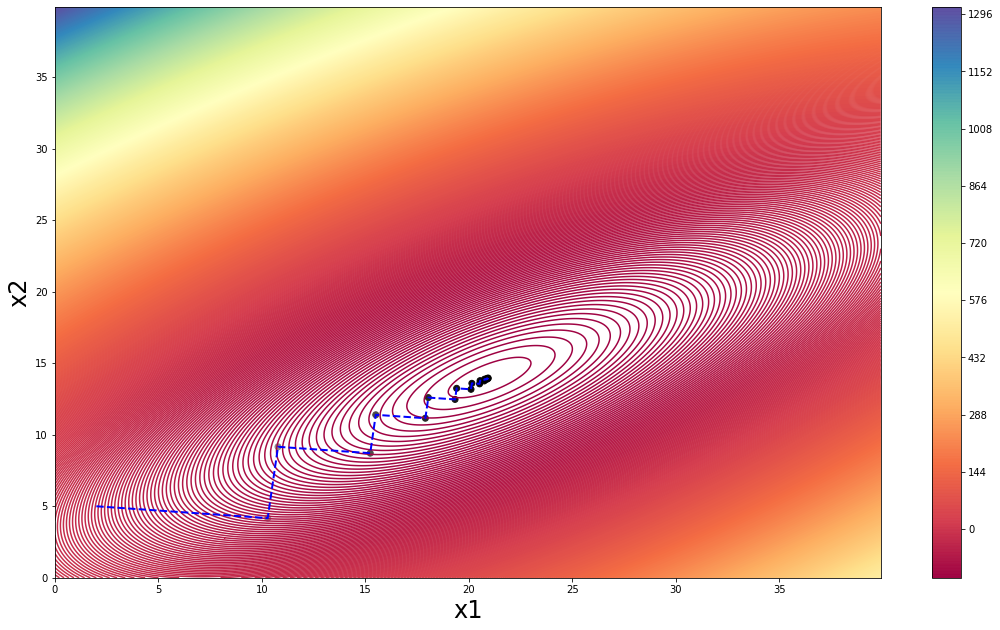

In [54]:
steepest_descent(1)